<a href="https://colab.research.google.com/github/cleitonmoya/MAE001_Trabalho2/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAE001 - Projeto \#2 

MAE001 - Modelagem Matemática em Finanças I \\
Professor: Marco A. Cabral

Alunos:
* Cleiton Moya de Almeida
* Gustaco Maciel Ribeiro
* Renato Santana


## Introdução

## Importação das Séries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2)
pd.options.display.float_format = '{:.2f}'.format

# Séries financeiras
dir = 'https://raw.githubusercontent.com/cleitonmoya/MAE001_Trabalho2/main/series/'
series = ['IBOV', 'BBDC4', 'ITUB4', 'CSNA3', 'GGBR4', 'B3SA3',
                  'PETR4', 'MGLU3', 'ABEV3', 'WEGE3', 'VIVT4']
url = dir + 'IBOV' + '.csv'

# Cria primeiro um dataframe somente com o IBOV
df = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data', 'Fechamento'], header=0)
df.columns=['IBOV']

# Carrega as demais séries para o dataframe
for _,ativo in enumerate(series):
  url = dir + ativo + '.csv'
  df[ativo] = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data','Fechamento'])

# Ordena o dataframe por data crescente (a fim de permitir correta localização)
df.sort_index(inplace=True) 
df = df.loc['2019-09-01':'2020-01-31'] # período analisado

Visualização das séries importadas:

In [166]:
df

,IBOV,BBDC4,ITUB4,CSNA3,GGBR4,B3SA3,PETR4,MGLU3,ABEV3,WEGE3,VIVT4
Data,,,,,,,,,,,
2019-09-02,100625.74,28.06,32.27,14.04,12.60,41.99,24.87,9.12,17.98,22.56,50.98
2019-09-03,99680.83,27.60,31.65,13.63,12.52,41.81,25.16,8.94,18.12,21.98,50.73
2019-09-04,101200.89,27.94,31.87,13.81,12.52,42.65,25.81,9.27,18.39,22.41,51.61
2019-09-05,102243.00,28.59,32.78,13.94,12.61,43.29,25.94,9.14,18.28,22.56,52.21
2019-09-06,102935.43,29.79,33.88,13.76,12.38,43.86,26.07,8.97,18.31,22.62,51.28
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,114481.84,30.22,32.35,13.73,19.91,46.18,28.03,13.43,18.55,40.68,57.50
2020-01-28,116478.98,30.26,32.34,13.63,20.16,47.57,28.80,14.23,18.80,41.71,58.03
2020-01-29,115384.84,29.83,31.84,13.35,20.10,47.10,28.85,14.31,18.30,42.09,57.65


## Questão 1

## Questão 2

* Setor Financeiro:
   * Banco Bradesco (BBDC4);
   * Banco Itaú-Unibanco (ITUB4);
* Setor de Siderurgia:
   * Companhia Siderúrigica Nacional (CSNA3)
   * Grupo Gerdau (GGBR4)
 


Análise de correlação das ações com o IBOV:

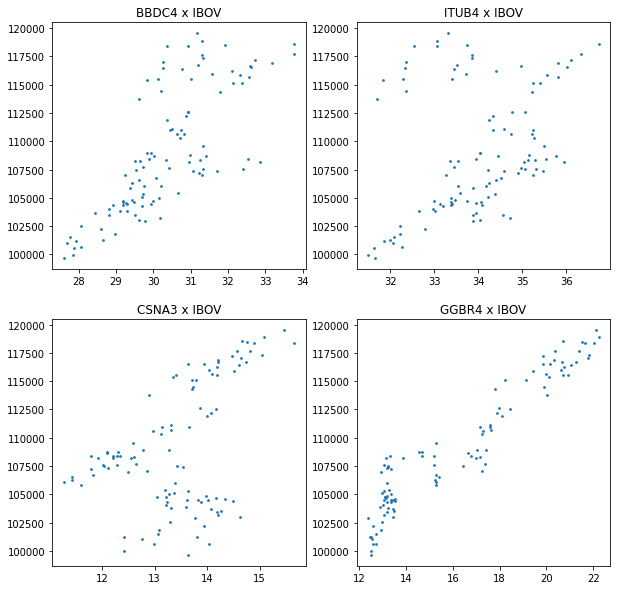

In [167]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].set_title('BBDC4 x IBOV')
axs[0,0].scatter(df.BBDC4, df.IBOV, s=3)

axs[0,1].set_title('ITUB4 x IBOV')
axs[0,1].scatter(df.ITUB4, df.IBOV, s=3)

axs[1,0].set_title('CSNA3 x IBOV')
axs[1,0].scatter(df.CSNA3, df.IBOV, s=3)

axs[1,1].set_title('GGBR4 x IBOV')
axs[1,1].scatter(df.GGBR4, df.IBOV, s=3)
plt.show()

Ativos ativos do mesmo setor:

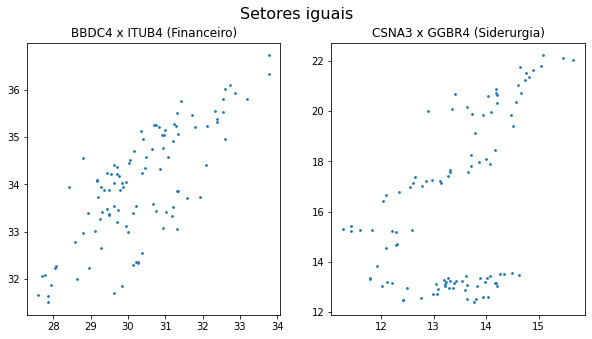

In [168]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Setores iguais', fontsize=16)
axs[0].set_title('BBDC4 x ITUB4 (Financeiro)')
axs[0].scatter(df.BBDC4, df.ITUB4, s=3)

axs[1].set_title('CSNA3 x GGBR4 (Siderurgia)')
axs[1].scatter(df.CSNA3, df.GGBR4, s=3)
plt.show()

Análise de correlação entre as ações:

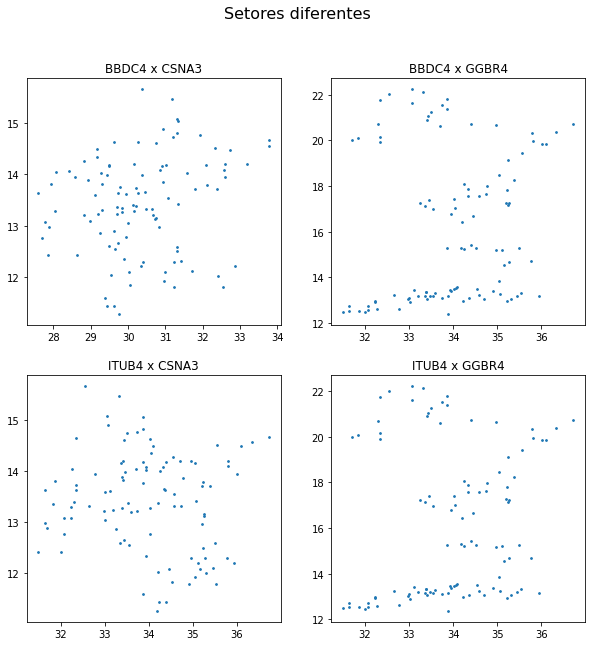

In [170]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Setores diferentes', fontsize=16)
axs[0,0].set_title('BBDC4 x CSNA3')
axs[0,0].scatter(df.BBDC4, df.CSNA3, s=3)
axs[0,1].set_title('BBDC4 x GGBR4')
axs[0,1].scatter(df.ITUB4, df.GGBR4, s=3)
axs[1,0].set_title('ITUB4 x CSNA3')
axs[1,0].scatter(df.ITUB4, df.CSNA3, s=3)
axs[1,1].set_title('ITUB4 x GGBR4')
axs[1,1].scatter(df.ITUB4, df.GGBR4, s=3)
plt.show()

Matriz de covariância dos ativos:

In [172]:
print(df.iloc[:,:5].cov())

             IBOV   BBDC4   ITUB4   CSNA3    GGBR4
IBOV  30251493.77 5695.91 2249.86 2402.46 16882.44
BBDC4     5695.91    1.88    1.28    0.24     2.49
ITUB4     2249.86    1.28    1.47   -0.12     0.55
CSNA3     2402.46    0.24   -0.12    0.93     1.49
GGBR4    16882.44    2.49    0.55    1.49    10.42


Podemos melhor visualizar através da matriz de correlação plotada na forma de um mapa de calor:

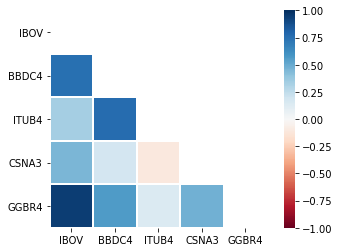

In [178]:
M_Cor = df.iloc[:,:5].corr()
mask = np.triu(np.ones_like(M_Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(M_Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, square=True)
plt.yticks(rotation=0) 
plt.show()

## Questão 3

Ativos escolhidos:
* BBDC4 - Bradesco
* ITUB4 - Itaú-Unibanco
* CSNA3 - CSN
* GGBR4 - Grupo Gerdau
* B3SA3 - B3
* PETR4 - Petrobras
* MGLU3 - Magazine Luíza
* ABEV3 - Ambev
* WEGE3 - WEG
* VIVT4 - Vivo

Retornos médios:

Matriz de covariância:

In [174]:
print(df.iloc[:,1:].cov())

       BBDC4  ITUB4  CSNA3  GGBR4  B3SA3  PETR4  MGLU3  ABEV3  WEGE3  VIVT4
BBDC4   1.88   1.28   0.24   2.49   0.96   1.74   1.28   0.07   4.09   1.47
ITUB4   1.28   1.47  -0.12   0.55   0.85   1.20   0.17  -0.13   0.75  -0.15
CSNA3   0.24  -0.12   0.93   1.49  -1.01   0.04   0.38   0.54   1.92   1.22
GGBR4   2.49   0.55   1.49  10.42   1.48   3.82   4.70   0.63  17.14   7.20
B3SA3   0.96   0.85  -1.01   1.48   4.46   1.77   1.54  -0.85   4.50   1.14
PETR4   1.74   1.20   0.04   3.82   1.77   2.49   1.92  -0.13   6.41   2.14
MGLU3   1.28   0.17   0.38   4.70   1.54   1.92   2.62   0.09   8.42   3.48
ABEV3   0.07  -0.13   0.54   0.63  -0.85  -0.13   0.09   0.44   0.76   0.61
WEGE3   4.09   0.75   1.92  17.14   4.50   6.41   8.42   0.76  31.24  12.72
VIVT4   1.47  -0.15   1.22   7.20   1.14   2.14   3.48   0.61  12.72   6.00


Matriz de correlação:

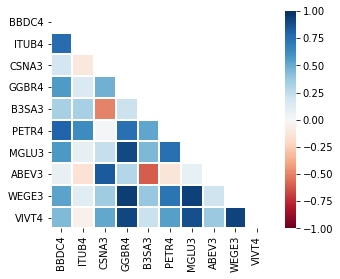

In [176]:
M_Cor2 = df.iloc[:,1:].corr()
mask = np.triu(np.ones_like(M_Cor2, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(M_Cor2, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, square=True)
plt.yticks(rotation=0) 
plt.show()

## Questão 4